<b>NOTE</b>:<br> This notebook is my understanding of chapter 10 of `Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow 2nd Edition` book written by `Aurelien Geron`, entitled as `Introduction to Artificial Neural Networks with Keras`.<br>
While most of the markdown and also code blocks have been copied from the chapter's notebook, the arraingment and changes made to the whole project is personalized based on my knowledge and what I comprehended and learned from the book. I'm going to use this notebook as a reference, when I want to apply Neural Network on Machine Learning projects in the future.

`Aurelien Geron`'s Github repository for the book can be found [here](https://github.com/ageron/handson-ml2).

# Objective

In this notebook we are going to explore different techniques of applying Neural Networks on different Machine Learning problems. So, feel free to jump into any section you like and try the codes out.

# Importing required libraries and modules

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# Building an Image Classifier Using the Sequential API

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_set_X_full, train_set_Y_full), (test_set_X, test_set_Y) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [3]:
train_set_X_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [4]:
train_set_X_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255. (train_set_X only)

In [5]:
valid_set_X, train_set_X = train_set_X_full[:5000] / 255., train_set_X_full[5000:] / 255.
valid_set_Y, train_set_Y = train_set_Y_full[:5000], train_set_Y_full[5000:]
test_set_X = test_set_X / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'` color map:

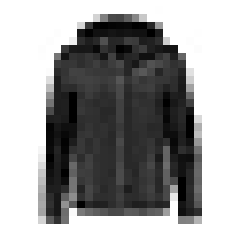

In [6]:
plt.imshow(train_set_X[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [7]:
train_set_Y

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[train_set_Y[0]]

'Coat'

The training set contains 55,000 images, validation set has 5,000 images, and the test set contains 10,000 images:

In [10]:
train_set_X.shape

(55000, 28, 28)

In [11]:
valid_set_X.shape

(5000, 28, 28)

In [12]:
test_set_X.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

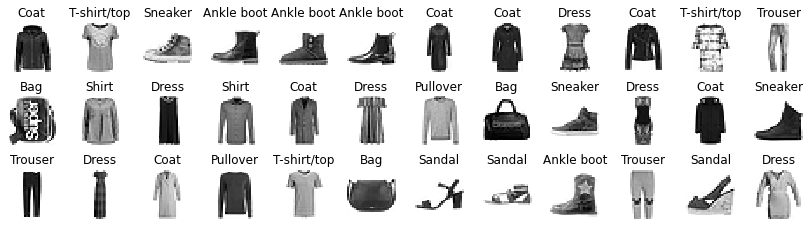

In [13]:
n_rows = 3
n_cols = 12
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_set_X[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[train_set_Y[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Creating the Model Using the Sequential API

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
model.layers[0].name

'flatten'

In [19]:
model.get_layer("dense").output_shape

(None, 300)

In [20]:
model.get_layer("dense_1").count_params()

30100

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [22]:
model.get_layer(hidden1.name) is hidden1

True

In [23]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [29]:
history = model.fit(train_set_X, train_set_Y, epochs=30,
                    validation_data=(valid_set_X, valid_set_Y))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0187 - accuracy: 0.6807 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5028 - accuracy: 0.8260 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4485 - accuracy: 0.8423 - val_loss: 0.5341 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4211 - accuracy: 0.8529 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4062 - accuracy: 0.8580 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3756 - accuracy: 0.8671 - val_loss: 0.3707 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3655 - accuracy: 0.8709 - val_loss: 0.3623 - val_accuracy:

In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

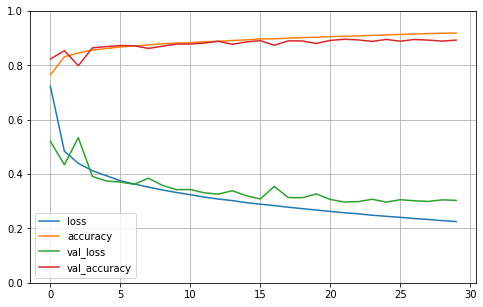

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(test_set_X, test_set_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8827


[0.33773481845855713, 0.8827000260353088]

In [35]:
samples_X = test_set_X[:3]
predictions = model.predict(samples_X)
predictions.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
predictions_classes = np.argmax(model.predict(samples_X), axis=1)

In [37]:
predictions_classes

array([9, 2, 1], dtype=int64)

In [38]:
[class_names[i] for i in predictions_classes]

['Ankle boot', 'Pullover', 'Trouser']

In [39]:
samples_Y = test_set_Y[:3]
samples_Y

array([9, 2, 1], dtype=uint8)

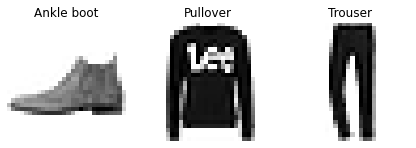

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(samples_X):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[test_set_Y[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Building a Regression MLP Using the Sequential API

For simplicity, we will use Scikit-Learn’s `fetch_california_housing()` function to load the data: this dataset is simpler than the one we used in `End_to_end_machine_learning_project`, since it contains only numerical features (there is no ocean_proximity feature), and there is no missing value.<br>
After loading the data, we split it into a training set, a validation set and a test set, and we scale all the features:

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
housing = fetch_california_housing()

train_set_X_full, test_set_X, train_set_Y_full, test_set_Y = train_test_split(housing.data, housing.target, random_state=42)
train_set_X, valid_set_X, train_set_Y, valid_set_Y = train_test_split(train_set_X_full, train_set_Y_full, random_state=42)

scaler = StandardScaler()
train_set_X = scaler.fit_transform(train_set_X)
valid_set_X = scaler.transform(valid_set_X)
test_set_X = scaler.transform(test_set_X)

In [44]:
train_set_X.shape

(11610, 8)

In [45]:
valid_set_X.shape

(3870, 8)

In [46]:
test_set_X.shape

(5160, 8)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(train_set_X, train_set_Y,
                    epochs=20,
                    validation_data=(valid_set_X, valid_set_Y))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4910 - val_loss: 0.4656

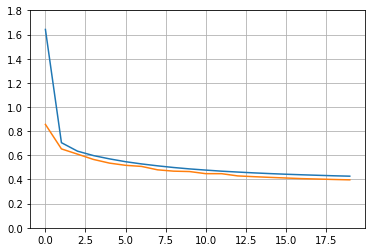

In [48]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1.8)
plt.show()

In [49]:
mse_test = model.evaluate(test_set_X, test_set_Y)
mse_test

162/162 [==============================] - 0s 830us/step - loss: 0.4212


0.42117786407470703

In [50]:
samples_X = test_set_X[:3]

In [51]:
predictions = model.predict(samples_X)
predictions

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

# Building Complex Models Using the Functional API

One example of a non-sequential neural network is a Wide & Deep neural network. It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations.<br>
<b>Note</b>: It's called functional API, because we pass previous layer to the next layer as a parameter, just like functions.

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_layer = keras.layers.Input(shape=[8])
hidden_layer_1 = keras.layers.Dense(30, activation="relu")(input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation="relu")(hidden_layer_1)
concat_layer = keras.layers.concatenate([input_layer, hidden_layer_2])
output_layer = keras.layers.Dense(1)(concat_layer)
model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [55]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [56]:
history = model.fit(train_set_X, train_set_Y,
                    epochs=20,
                    validation_data=(valid_set_X, valid_set_Y))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9731 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7638 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6045 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5862 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5452 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5243 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5185 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4947 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4782 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4708 - val_loss: 0.4313

In [57]:
mse_test = model.evaluate(test_set_X, test_set_Y)

162/162 [==============================] - 0s 832us/step - loss: 0.4032


In [58]:
predictions = model.predict(samples_X)
predictions

array([[0.4701073],
       [1.8735044],
       [3.379823 ]], dtype=float32)

## Multi Inputs through Wide path and Deep path

Now, what if we wanted to send a subset of the features through the wide path, and a
different subset (with overlapping) through the deep path. In
this case, one solution is to use multiple inputs. For example, suppose we want to
send 5 features through the wide path (features 0 to 4), and 6 features through the
deep path (features 2 to 7):

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
input_layer_A = keras.layers.Input(shape=[5], name="wide_input")
input_layer_B = keras.layers.Input(shape=[6], name="deep_input")
hidden_layer_1 = keras.layers.Dense(30, activation="relu")(input_layer_B)
hidden_layer_2 = keras.layers.Dense(30, activation="relu")(hidden_layer_1)
concat_layer = keras.layers.concatenate([input_layer_A, hidden_layer_2])
output_layer = keras.layers.Dense(1, name="output")(concat_layer)
model = keras.models.Model(inputs=[input_layer_A, input_layer_B], outputs=[output_layer])

In [61]:
model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [62]:
train_set_X_A, train_set_X_B = train_set_X[:, :5], train_set_X[:, 2:]
valid_set_X_A, valid_set_X_B = valid_set_X[:, :5], valid_set_X[:, 2:]
test_set_X_A, test_set_X_B = test_set_X[:, :5], test_set_X[:, 2:]
samples_X_A, samples_X_B = test_set_X_A[:3], test_set_X_B[:3]
samples_Y = test_set_Y[:3]

In [63]:
history = model.fit((train_set_X_A, train_set_X_B), train_set_Y,
                    epochs=20,
                    validation_data=((valid_set_X_A, valid_set_X_B), valid_set_Y))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.1941 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7247 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6176 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5799 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5409 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5173 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5186 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4977 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4765 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4676 - val_loss: 0.4315

In [64]:
mse_test = model.evaluate((test_set_X_A, test_set_X_B), test_set_Y)

162/162 [==============================] - 0s 1ms/step - loss: 0.4219


In [65]:
predictions = model.predict((samples_X_A, samples_X_B))
predictions

array([[0.30591208],
       [1.9540672 ],
       [3.442611  ]], dtype=float32)

## Multi Outputs

There are also many use cases in which you may want to have multiple outputs:<br><br>
• The task may demand it, for example you may want to locate and classify the
main object in a picture. This is both a regression task (finding the coordinates of
the object’s center, as well as its width and height) and a classification task.<br>
• Similarly, you may have multiple independent tasks to perform based on the
same data. Sure, you could train one neural network per task, but in many cases
you will get better results on all tasks by training a single neural network with
one output per task. This is because the neural network can learn features in the
data that are useful across tasks.<br>
• Another use case is as a regularization technique (i.e., a training constraint whose
objective is to reduce overfitting and thus improve the model’s ability to generalize).
For example, you may want to add some auxiliary outputs in a neural network
architecture to ensure that the underlying part of the
network learns something useful on its own, without relying on the rest of the
network.

Adding an auxiliary output for regularization:

In [66]:
np.random.seed(42)
tf.random.set_seed(42)

In [67]:
input_layer_A = keras.layers.Input(shape=[5], name="wide_input")
input_layer_B = keras.layers.Input(shape=[6], name="deep_input")
hidden_layer_1 = keras.layers.Dense(30, activation="relu")(input_layer_B)
hidden_layer_2 = keras.layers.Dense(30, activation="relu")(hidden_layer_1)
concat_layer = keras.layers.concatenate([input_layer_A, hidden_layer_2])
output_layer = keras.layers.Dense(1, name="output")(concat_layer)
auxiliary_output_layer = keras.layers.Dense(1, name="auxiliary_output")(hidden_layer_2)
model = keras.models.Model(inputs=[input_layer_A, input_layer_B], outputs=[output_layer, auxiliary_output_layer])

Each output will need its own loss function, so when we compile the model we
should pass a list of losses (if we pass a single loss, Keras will assume that the same
loss must be used for all outputs). By default, Keras will compute all these losses and
simply add them up to get the final loss used for training. However, we care much
more about the main output than about the auxiliary output (as it is just used for regularization),
so we want to give the main output’s loss a much greater weight. Fortunately,
it is possible to set all the loss weights when compiling the model:

In [68]:
model.compile(loss=["mse", "mse"],
              loss_weights=[0.9, 0.1],
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [69]:
history = model.fit([train_set_X_A, train_set_X_B], [train_set_Y, train_set_Y],
                    epochs=20,
                    validation_data=([valid_set_X_A, valid_set_X_B], [valid_set_Y, valid_set_Y]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.4633 - output_loss: 3.3289 - auxiliary_output_loss: 4.6732 - val_loss: 1.6233 - val_output_loss: 0.8468 - val_auxiliary_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9807 - output_loss: 0.7503 - auxiliary_output_loss: 3.0537 - val_loss: 1.5163 - val_output_loss: 0.6836 - val_auxiliary_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7742 - output_loss: 0.6290 - auxiliary_output_loss: 2.0810 - val_loss: 1.4639 - val_output_loss: 0.6229 - val_auxiliary_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6952 - output_loss: 0.5897 - auxiliary_output_loss: 1.6449 - val_loss: 1.3388 - val_output_loss: 0.5481 - val_auxiliary_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6469 - output_loss: 0.5508 - auxiliary_output_loss: 1.5118 -

In [70]:
total_loss, output_loss, aux_loss = model.evaluate((test_set_X_A, test_set_X_B), (test_set_Y, test_set_Y))

162/162 [==============================] - 0s 1ms/step - loss: 0.4668 - output_loss: 0.4178 - auxiliary_output_loss: 0.9082


In [71]:
output_predictions, aux_predictions = model.predict((samples_X_A, samples_X_B))

In [72]:
output_predictions

array([[0.26762432],
       [1.9807628 ],
       [3.3396287 ]], dtype=float32)

In [73]:
aux_predictions

array([[0.9593649],
       [1.9240992],
       [2.5152814]], dtype=float32)

# Saving and Restoring

In [74]:
np.random.seed(42)
tf.random.set_seed(42)

In [75]:
model.save("my_keras_model.h5")

In [76]:
model = keras.models.load_model("my_keras_model.h5")

In [77]:
output_predictions, aux_predictions = model.predict((samples_X_A, samples_X_B))

In [78]:
output_predictions

array([[0.26762432],
       [1.9807628 ],
       [3.3396287 ]], dtype=float32)

In [79]:
aux_predictions

array([[0.9593649],
       [1.9240992],
       [2.5152814]], dtype=float32)

In [80]:
model.save_weights("my_keras_weights.ckpt")

In [81]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [84]:
model.compile(loss="mse",
              optimizer=keras.optimizers.SGD(lr=1e-3))

the `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch. Moreover, if you use a validation set during training, you can set `save_best_only=True` when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. This
way, you do not need to worry about training for too long and overfitting the training set. Simply restore the last model saved after training, and this will be the best model on the validation set. This is a simple way to implement <b>early stopping</b>.

In [85]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [86]:
history = model.fit(train_set_X, train_set_Y,
                    epochs=20,
                    validation_data=(valid_set_X, valid_set_Y),
                    callbacks=[checkpoint_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4549 - val_loss: 0.4379

In [87]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best checkpoint

In [88]:
mse_test = model.evaluate(test_set_X, test_set_Y)

162/162 [==============================] - 0s 1ms/step - loss: 0.4003


Another way to implement <b>early stopping</b> is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model. You can combine both callbacks to both save checkpoints of your model (in case your computer crashes), and actually interrupt training early when there is no more progress (to avoid wasting time and resources). Besides, The number of epochs can be set to a large value since training will stop automatically when there is no more progress. Moreover, there is no need to restore the best model saved in this case since the EarlyStopping callback will keep track of the best weights and restore them for us at the end of training.

In [89]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [90]:
history = model.fit(train_set_X, train_set_Y,
                    epochs=100,
                    validation_data=(valid_set_X, valid_set_Y),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4006 - val_loss: 0.3751
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3977 - val_loss: 0.3728
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3949 - val_loss: 0.3691
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - val_loss: 0.3677
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3897 - val_loss: 0.3648
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3873 - val_loss: 0.3625
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3851 - val_loss: 0.3604
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3830 - val_loss: 0.3593
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3808 - val_loss: 0.3579
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3786 - val_lo

In [91]:
mse_test = model.evaluate(test_set_X, test_set_Y)

162/162 [==============================] - 0s 1ms/step - loss: 0.3488


If you need extra control, you can easily write your own custom callbacks. For example, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

In [92]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [93]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(train_set_X, train_set_Y,
                    epochs=1,
                    validation_data=(valid_set_X, valid_set_Y),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 1s 3ms/step - loss: 0.3488 - val_loss: 0.3644

val/train: 1.04


# Visualization Using TensorBoard

TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by
your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, and more.<br>
To use it, you must modify your program so that it outputs the data you want to visualize to special binary log files called `event files`. Each binary data record is called a summary. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations. this allows you to visualize live data (with a short delay), such as the learning curves during training. In general, you want to point the TensorBoard server to a root log directory, and configure your program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up.

In [94]:
root_log_dir = os.path.join(os.curdir, "my_logs")
root_log_dir

'.\\my_logs'

In [95]:
def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_log_dir, run_id)

run_log_dir = get_run_log_dir()
run_log_dir

'.\\my_logs\\run_2021_06_13-12_34_27'

In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [98]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [99]:
tensorboard_cb = keras.callbacks.TensorBoard(run_log_dir)

In [100]:
history = model.fit(train_set_X, train_set_Y, epochs=30,
                    validation_data=(valid_set_X, valid_set_Y),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4549 - val_loss: 0.4379

To start the TensorBoard server, one option is to open a terminal, go to this notebook's directory (`C:\Users\Behzad\Desktop\Git-Projects\Machine-Learning - master\Neural Networks`), then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this (uncomment first):

In [101]:
#%load_ext tensorboard
#%tensorboard --logdir=./my_logs --port=6006

By openning TensorBoard, you can see the history of the run you just have saved in the `my_logs` folder, and compare the learning rates of its loss and val_loss.<br>
Now let's try the same model with different learning rate:

In [102]:
run_log_dir_2 = get_run_log_dir()
run_log_dir_2

'.\\my_logs\\run_2021_06_13-12_34_49'

In [103]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [104]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [105]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [106]:
tensorboard_cb = keras.callbacks.TensorBoard(run_log_dir_2)

In [107]:
history = model.fit(train_set_X, train_set_Y, epochs=30,
                    validation_data=(valid_set_X, valid_set_Y),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7645 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 8159520618.2209 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3439 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3546 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3513 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3274 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3639 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 1.3487 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3445 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3697 - val_l

Notice how TensorBoard now sees two runs, and you can compare the learning curves of all the saved runs.

# Fine-Tuning Neural Network Hyperparameters

In [108]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

The flexibility of neural networks is also one of their main drawbacks. There are many hyperparameters to tweak.
Not only can you use any imaginable network architecture, but even in a simple MLP you can change the number of layers,
the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic,
and much more. How do you know what combination of hyperparameters is the best for your task?

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or using K-fold cross-validation). For this, one approach is simply use GridSearchCV or RandomizedSearchCV to explore the hyperparameter
space. For this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [109]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    
    """Input Layer"""
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    """Hidden Layers"""
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    """Output Layer"""
    model.add(keras.layers.Dense(1))
    
    model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=learning_rate))
    
    return model

In [110]:
my_model = build_model()

In [111]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [112]:
keras_regressor_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)

The KerasRegressor object is a thin wrapper around the Keras model built using build_model(). Since we did not specify any hyperparameter when creating it, it will just use the default hyperparameters we defined in build_model(). Now we can use
this object like a regular Scikit-Learn regressor. We can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method. Note that any extra parameter you pass to the fit()
method will simply get passed to the underlying Keras model.

In [113]:
history = keras_regressor_model.fit(train_set_X, train_set_Y,
              epochs=100,
              validation_data=(valid_set_X, valid_set_Y),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.9281 - val_loss: 1.7696
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6750 - val_loss: 0.5361
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5481 - val_loss: 0.5093
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4993 - val_loss: 0.4392
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4605 - val_loss: 0.4161
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4412 - val_loss: 0.4036
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4468 - val_loss: 0.3930
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4289 - val_loss: 0.3925
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4117 - val_loss: 0.3853
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4073 - val_lo

Also note that the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses (i.e., higher should be better).

In [114]:
mse_test = keras_regressor_model.score(test_set_X, test_set_Y)

162/162 [==============================] - 0s 1ms/step - loss: 0.3421


In [115]:
predictions = keras_regressor_model.predict(samples_X)
predictions

array([0.6161098, 1.6638539, 4.221405 ], dtype=float32)

In [116]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": [i for i in range(100)],
    "learning_rate": [(10**-i) for i in range(1, 5)] #reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_regressor_model, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(train_set_X, train_set_Y, epochs=100,
                  validation_data=(valid_set_X, valid_set_Y),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.6440 - val_loss: 1.7879
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.1258 - val_loss: 0.9685
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7961 - val_loss: 0.6780
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6735 - val_loss: 0.5945
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6147 - val_loss: 0.5620
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5736 - val_loss: 0.5342
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5609 - val_loss: 0.5106
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5281 - val_loss: 0.4928
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5042 - val_loss: 0.4787
Epoch 10/100
242/242 [========

Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3310 - val_loss: 0.3648
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3341 - val_loss: 0.3655
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3232 - val_loss: 0.3650
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3532 - val_loss: 0.3629
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3490 - val_loss: 0.3571
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3300 - val_loss: 0.3624
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3370 - val_loss: 0.3524
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3445 - val_loss: 0.3587
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3379 - val_loss: 0.3525
Epoch 90/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3296

242/242 [==============================] - 0s 2ms/step - loss: 0.3771 - val_loss: 0.4250
Epoch 32/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3999 - val_loss: 0.4229
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3840 - val_loss: 0.4201
Epoch 34/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3665 - val_loss: 0.4260
Epoch 35/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3736 - val_loss: 0.4217
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3707 - val_loss: 0.4169
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3758 - val_loss: 0.4172
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3705 - val_loss: 0.4143
Epoch 39/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3878 - val_loss: 0.4149
Epoch 40/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3747 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.6399 - val_loss: 0.6491
Epoch 30/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6136 - val_loss: 0.6349
Epoch 31/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5857 - val_loss: 0.6226
Epoch 32/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5903 - val_loss: 0.6127
Epoch 33/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5902 - val_loss: 0.6040
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5915 - val_loss: 0.5964
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5864 - val_loss: 0.5898
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5677 - val_loss: 0.5831
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5890 - val_loss: 0.5780
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5466 - val_loss: 

Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1132 - val_loss: 27.5585
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0909 - val_loss: 26.6800
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0025 - val_loss: 25.5032
Epoch 11/100
121/121 [==============================] - 0s 1ms/step - loss: 1.4563
[CV] END .....learning_rate=0.0001, n_hidden=2, n_neurons=59; total time=   6.1s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 5.6188 - val_loss: 4.1579
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.9978 - val_loss: 3.7260
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 2.9332 - val_loss: 4.0073
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 2.3066 - val_loss: 4.4764
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1.7348 - val_loss: 4.4897
Epoch 6/100
242/242 [===

Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5119 - val_loss: 0.4704
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4932 - val_loss: 0.4686
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4931 - val_loss: 0.4670
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4927 - val_loss: 0.4648
Epoch 80/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4768 - val_loss: 0.4628
Epoch 81/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4742 - val_loss: 0.4610
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4892 - val_loss: 0.4593
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4655 - val_loss: 0.4576
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4908 - val_loss: 0.4559
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4912

242/242 [==============================] - 1s 2ms/step - loss: 0.6107 - val_loss: 10.0116
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5904 - val_loss: 10.9103
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5771 - val_loss: 11.7856
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5714 - val_loss: 12.6011
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5554 - val_loss: 13.3206
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5568 - val_loss: 14.0559
Epoch 12/100
121/121 [==============================] - 0s 768us/step - loss: 0.8977
[CV] END ......learning_rate=0.001, n_hidden=0, n_neurons=60; total time=   6.6s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 6.9799 - val_loss: 4.9077
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.0292 - val_loss: 1.8819
Epoch 3/100
242/242 [=========

242/242 [==============================] - 0s 2ms/step - loss: 0.8159 - val_loss: 1.3228
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7997 - val_loss: 1.2877
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7804 - val_loss: 1.2441
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7581 - val_loss: 1.2163
Epoch 39/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7566 - val_loss: 1.1888
Epoch 40/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7094 - val_loss: 1.1646
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7233 - val_loss: 1.1433
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7333 - val_loss: 1.1222
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7104 - val_loss: 1.1029
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6973 - val_loss: 

242/242 [==============================] - 1s 2ms/step - loss: 2.2700 - val_loss: 3.3106
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 2.2882 - val_loss: 3.2602
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 1.9654 - val_loss: 3.2281
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 1.8549 - val_loss: 3.2125
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 1.7254 - val_loss: 3.2112
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5528 - val_loss: 3.2230
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4282 - val_loss: 3.2461
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3699 - val_loss: 3.2794
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3051 - val_loss: 3.3215
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2398 - val_loss: 

242/242 [==============================] - 1s 2ms/step - loss: 0.5016 - val_loss: 0.4712
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4707 - val_loss: 0.4586
Epoch 12/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4442 - val_loss: 0.4487
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4686 - val_loss: 0.4346
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4450 - val_loss: 0.4314
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4472 - val_loss: 0.4211
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4231 - val_loss: 0.4167
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4340 - val_loss: 0.4169
Epoch 18/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4308 - val_loss: 0.4119
Epoch 19/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4035 - val_loss: 

242/242 [==============================] - 1s 3ms/step - loss: 0.3130 - val_loss: 0.3425
Epoch 91/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3361 - val_loss: 0.3275
Epoch 92/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3422 - val_loss: 0.3339
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3455 - val_loss: 0.3282
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3321 - val_loss: 0.3258
Epoch 95/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3113 - val_loss: 0.3315
Epoch 96/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3207 - val_loss: 0.3249
Epoch 97/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3253 - val_loss: 0.3237
Epoch 98/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3227 - val_loss: 0.3234
Epoch 99/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3217 - val_loss: 

242/242 [==============================] - 1s 2ms/step - loss: 0.4319 - val_loss: 0.4304
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4565 - val_loss: 0.4148
Epoch 14/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4405 - val_loss: 0.4174
Epoch 15/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4362 - val_loss: 0.4195
Epoch 16/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4154 - val_loss: 0.4067
Epoch 17/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4348 - val_loss: 0.4208
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4274 - val_loss: 0.4029
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4061 - val_loss: 0.4074
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4093 - val_loss: 0.4037
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3989 - val_loss: 

242/242 [==============================] - 1s 3ms/step - loss: 0.3820 - val_loss: 0.4153
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3859 - val_loss: 0.3836
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3832 - val_loss: 0.3780
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3956 - val_loss: 0.4165
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3892 - val_loss: 0.3899
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3768 - val_loss: 0.4260
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3784 - val_loss: 0.3968
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3660 - val_loss: 0.3940
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3950 - val_loss: 0.4207
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3749 - val_loss: 

242/242 [==============================] - 1s 3ms/step - loss: 0.5484 - val_loss: 0.5310
Epoch 11/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5560 - val_loss: 0.5159
Epoch 12/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5311 - val_loss: 0.5025
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4970 - val_loss: 0.4916
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4983 - val_loss: 0.4851
Epoch 15/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5151 - val_loss: 0.4758
Epoch 16/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4949 - val_loss: 0.4638
Epoch 17/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4708 - val_loss: 0.4533
Epoch 18/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4847 - val_loss: 0.4440
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4723 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.3434 - val_loss: 0.3468
Epoch 91/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3523 - val_loss: 0.3503
Epoch 92/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3448 - val_loss: 0.3414
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3358 - val_loss: 0.3597
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3571 - val_loss: 0.3524
Epoch 95/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3568 - val_loss: 0.3526
Epoch 96/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3439 - val_loss: 0.3600
Epoch 97/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3434 - val_loss: 0.3570
Epoch 98/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3373 - val_loss: 0.3395
Epoch 99/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3331 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.4677 - val_loss: 16.7926
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5305 - val_loss: 18.2995
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5038 - val_loss: 20.1533
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4974 - val_loss: 16.9126
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5142 - val_loss: 16.9343
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5064 - val_loss: 19.5612
Epoch 20/100
121/121 [==============================] - 0s 895us/step - loss: 0.9214
[CV] END .......learning_rate=0.01, n_hidden=0, n_neurons=66; total time=   8.1s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 2.5224 - val_loss: 136.9973
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0917 - val_loss: 167.6389
Epoch 3/100
242/242 [==

242/242 [==============================] - 0s 2ms/step - loss: 0.6167 - val_loss: 1.1641
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6054 - val_loss: 1.1544
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6346 - val_loss: 1.1458
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6324 - val_loss: 1.1374
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6257 - val_loss: 1.1292
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5943 - val_loss: 1.1221
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6435 - val_loss: 1.1150
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6271 - val_loss: 1.1086
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6153 - val_loss: 1.0999
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6395 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 3.8185 - val_loss: 6.1676
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 3.4815 - val_loss: 5.6756
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 3.3048 - val_loss: 5.2408
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 3.0197 - val_loss: 4.8493
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 2.7640 - val_loss: 4.4951
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 2.6414 - val_loss: 4.1841
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 2.3575 - val_loss: 3.9005
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 2.1091 - val_loss: 3.6444
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 2.0138 - val_loss: 3.4164
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 1.9288 - val_loss: 3.2

242/242 [==============================] - 0s 1ms/step - loss: 0.5823 - val_loss: 0.9904
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5995 - val_loss: 0.9887
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5880 - val_loss: 0.9875
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6031 - val_loss: 0.9849
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6010 - val_loss: 0.9815
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6113 - val_loss: 0.9800
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5808 - val_loss: 0.9768
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5762 - val_loss: 0.9755
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6025 - val_loss: 0.9733
Epoch 95/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6161 - val_loss: 

c:\users\behzad\desktop\jupyter projects\venv\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [-3.64101499e-01 -7.95659502e-01 -6.63446168e-01 -7.39055077e-01
 -4.14570282e-01 -3.94589305e-01 -3.81503016e-01             nan
 -8.76586076e+05 -6.80737336e-01]
  category=UserWarning


363/363 [==============================] - 1s 2ms/step - loss: 3.2836 - val_loss: 0.9158
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8439 - val_loss: 0.6787
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6940 - val_loss: 0.6283
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6449 - val_loss: 0.5786
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5942 - val_loss: 0.5439
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5587 - val_loss: 0.5162
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5475 - val_loss: 0.4916
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5154 - val_loss: 0.4699
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4919 - val_loss: 0.4524
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4734 - val_loss: 0.4386
E

363/363 [==============================] - 1s 2ms/step - loss: 0.3179 - val_loss: 0.3205
Epoch 82/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3281 - val_loss: 0.3088
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3236 - val_loss: 0.3120
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3096 - val_loss: 0.3365
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3145 - val_loss: 0.3197
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3067 - val_loss: 0.3070
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3306 - val_loss: 0.3248
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3102 - val_loss: 0.3277
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3080 - val_loss: 0.3359
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3033 - val_loss: 

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001A550A5EA90>,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001,
                                                          0.0001],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, ...]},
                   verbose=2)

In [117]:
rnd_search_cv.best_params_

{'n_neurons': 26, 'n_hidden': 3, 'learning_rate': 0.001}

In [118]:
rnd_search_cv.best_score_

-0.36410149931907654

In [119]:
rnd_search_cv.best_estimator_

In [120]:
rnd_search_cv.score(test_set_X, test_set_Y)

162/162 [==============================] - 0s 917us/step - loss: 0.3176


-0.31761273741722107

In [121]:
model = rnd_search_cv.best_estimator_.model
model

In [122]:
model.evaluate(test_set_X, test_set_Y)

162/162 [==============================] - 0s 950us/step - loss: 0.3176


0.31761273741722107

You can now save this model, evaluate it on the test set, and if you are satisfied with
its performance, deploy it to production.

Fortunately, there are many techniques to explore a search space much more efficiently than randomly. Their core idea is simple: when a region of the space turns out to be good, it should be explored more. This takes care of the “zooming” process for
you and leads to much better solutions in much less time. Here are a few Python libraries you can use to optimize hyperparameters:<br>

• `Hyperopt`: a popular Python library for optimizing over all sorts of complex search spaces (including real values such as the learning rate, or discrete values such as the number of layers).
• `Hyperas, kopt or Talos`: optimizing hyperparameters for Keras model (the first two are based on Hyperopt).
• `Scikit-Optimize (skopt)`: a general-purpose optimization library. The Bayes SearchCV class performs Bayesian optimization using an interface similar to GridSearchCV.
• `Spearmint`: a Bayesian optimization library.
• `Sklearn-Deap`: a hyperparameter optimization library based on evolutionary algorithms, also with a GridSearchCV-like interface.
• And many more!<br>

Moreover, many companies offer services for hyperparameter optimization. For example Google Cloud ML Engine has a hyperparameter tuning service. Other companies provide APIs for hyperparameter optimization, such as Arimo, SigOpt, Oscar and many more.